# Introduction

When I started doing this analysis my main goal was getting experience. I'm still learning and trying to improve my skills, so there might be some areas can be improved. My main objectives on this project are:
* **Explorating and visualising the data with pandas and seaborn packages**
* **Building and tuning couple regression models to get some stable results with sklearn and xgboost packages**

## Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


## Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)



* **So let's begin with importing neccesary libraries:**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb

* **Exploratory data analysis would be a great start for us. We need to get some insights before building our models.**

In [19]:
df=pd.read_csv('auto-mpg.csv')
display(df.head())
display(df.tail())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


* **Car names can be dropped since it'll have little effect on our models.**

In [20]:
df.drop(['car name'], axis=1, inplace=True)
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [22]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

* **When we take a look at basic statistics we can already see that horsepower column has datatype of object but it should be a float type. In order to convert this column first we need to replace missing value "?" in this data to "NaN".**

In [23]:
df['horsepower']=df['horsepower'].replace('?',np.NaN)
df['horsepower']=df["horsepower"].astype(float)

In [24]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
print('Shape:')
display(df.shape)

Shape:


(398, 8)

* **Everything seems in order...**

In [26]:
org=df.copy()
org['origin']=df.origin.map({1: 'US', 2: 'Asian',3:'European'})
org["origin"].value_counts(normalize=True)

US          0.625628
European    0.198492
Asian       0.175879
Name: origin, dtype: float64

* **When we look at the origins of the automobiles, we see that most of this dataset is from USA.(Around 62%)**

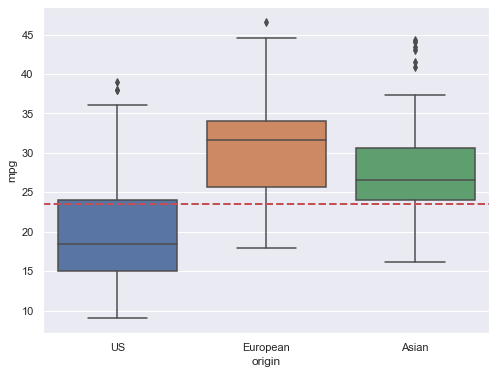

In [27]:
sns.set()
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='origin', y="mpg", data=org)
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
plt.show()

* **From this boxplot we can easily see that US manufactured cars are least efficent in terms of mpg and they are almost below global average. So let's take a look of relations between car features:**

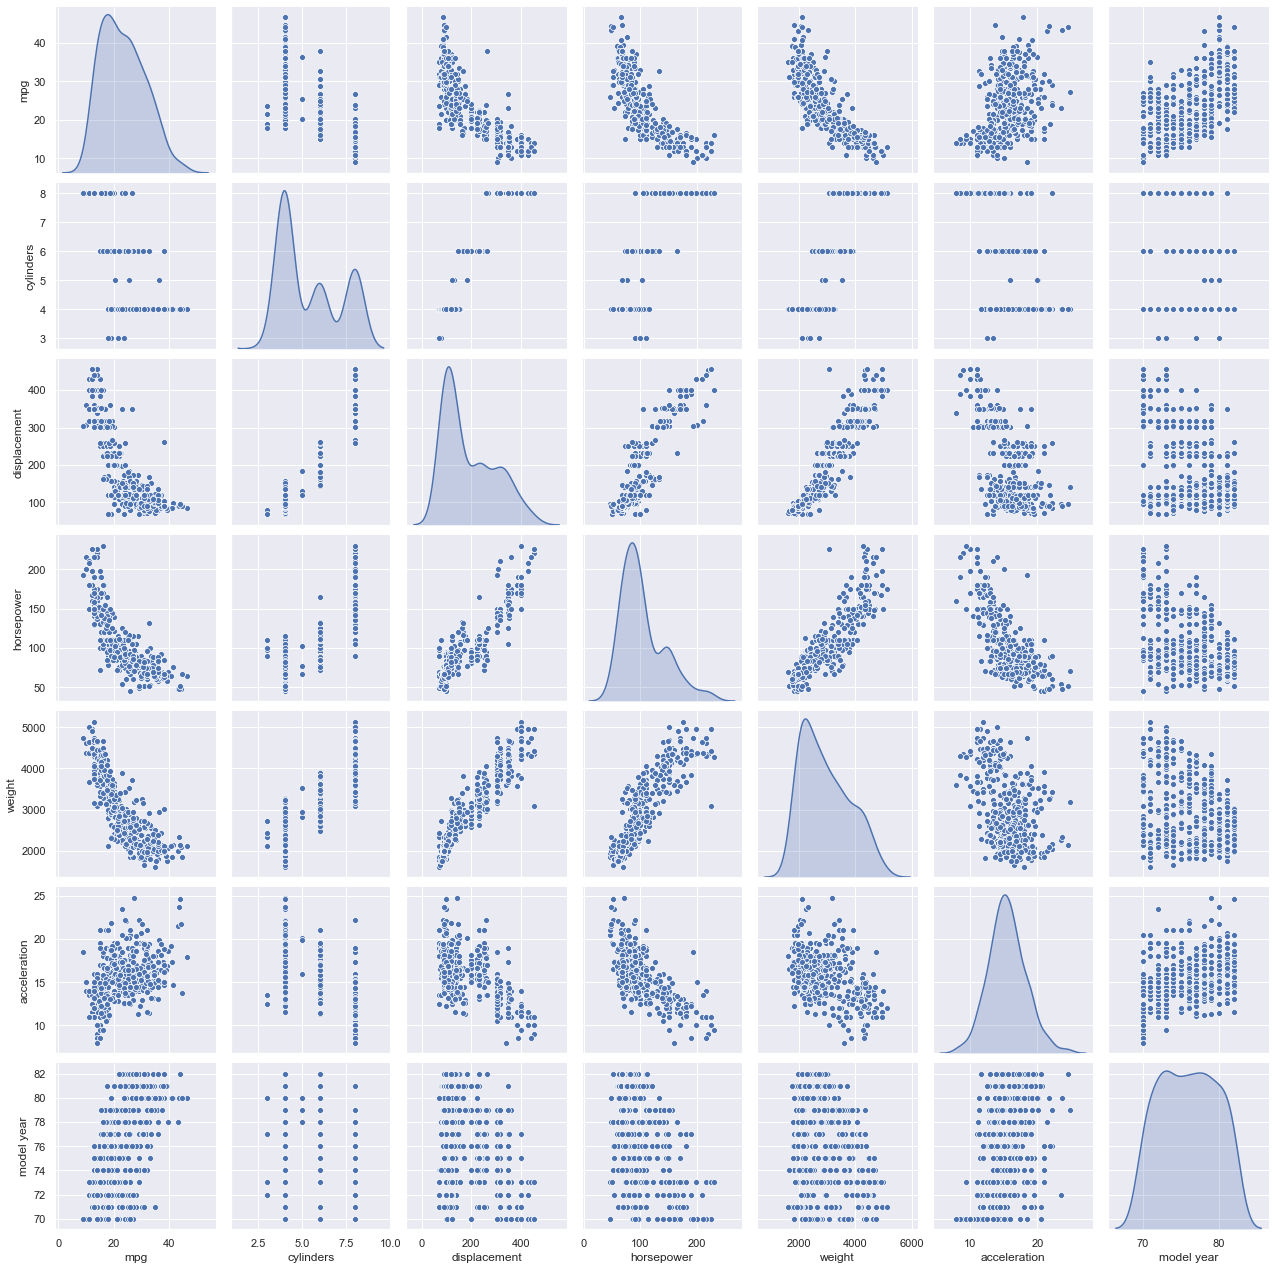

In [28]:
sns.pairplot(org,diag_kind="kde")
plt.show()

* **When we look at figure above we notice there is some degree of relation between mpg and weight, horsepower, displacement. Interesting... Let's take a look at pearson correlation if it supports this trend too...**

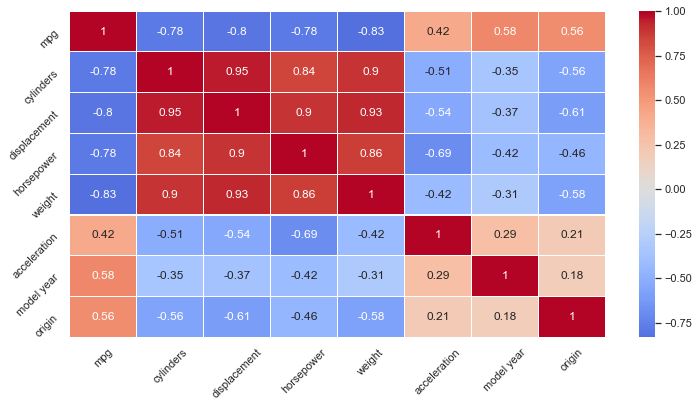

In [29]:
corrmat=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corrmat, annot=True, linewidths=0.2, cmap='coolwarm',center=0)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

*Our heatmap confirms there is some kind of relation between these features. Let's see if we can catch this with our regression models.*

* **It's time to build some regression models**

Before building our models we should scale our data to make our models gets less effected by outliers. We also replace missing values in horsepower column with the most frequent values, it's better than losing whole rows because of one missing value. We also going to reduce skewness on our data using np.log.

In [30]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['horsepower']=imp_freq.fit_transform(df[['horsepower']]).ravel()
features=['cylinders','displacement','horsepower','weight','acceleration','model year','origin']
X= np.log(df[features])
y=df['mpg']
sc = StandardScaler()
X=sc.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [32]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)
print(r2_score(y_test, y_pred))

2.814404035494186
0.8619849827869406


* **Our basic regression model shows decent results but we might get better results with different approaches.**

2.784155480528586
0.8649357461731612


cylinders       0.006694
displacement    0.355974
horsepower      0.103946
weight          0.338908
acceleration    0.025182
model year      0.164318
origin          0.004977
dtype: float64

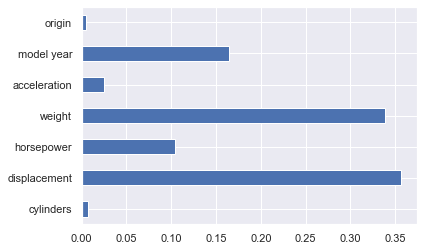

In [33]:
gb_regressor = GradientBoostingRegressor(n_estimators=5000)
gb_regressor.fit(X_train,y_train)
y_predicted_gbr = gb_regressor.predict(X_test)
rmse_bgr = np.sqrt(mean_squared_error(y_test,y_predicted_gbr))

rmse=np.sqrt(mean_squared_error(y_test,y_predicted_gbr))
print(rmse)
print(r2_score(y_test, y_predicted_gbr))

sns.set()
fig= pd.Series(gb_regressor.feature_importances_,index=features)
display(fig)
fig.plot.barh()
plt.show()

* **When we trained GradientBoostingRegressor on our data we got really small improvement. Let's look at feature importances: We can see displacement and weight are important factors on fuel efficiency of car.**

Let's continue with our last regressor, but before we train the model we might try hyper-parameter tuning of our parameters. Since GridSearch takes a lot of resources we going with RandomizedSearch...

In [34]:
parameters_for_testing = {
'colsample_bytree':np.linspace(0, 1.0, num=11),
'learning_rate':np.linspace(0, 1.0, num=11),
'max_depth':np.arange(1, 8),
'n_estimators':[10000],
"min_child_weight":np.arange(1, 8),
"gamma":np.linspace(0, 1.0, num=11)
}

xg_reg=xgb.XGBRegressor()

gsearch1 = RandomizedSearchCV(estimator = xg_reg, param_distributions = parameters_for_testing, n_jobs=-1,
                              verbose=3, n_iter=25, cv=15, scoring='neg_mean_squared_error')
gsearch1.fit(X_train, y_train)
print('best estimator')
print(gsearch1.best_estimator_)
print('best score')
print (gsearch1.best_score_)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  2.4min finished


[06:17:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best estimator
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
best score
-9.177155200565098


In [38]:
xg_reg=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.7000000000000001,
             importance_type='gain', learning_rate=0.30000000000000004,
             max_delta_step=0, max_depth=7, min_child_weight=5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
xg_reg.fit(X_train,y_train)
xg_y_pred=xg_reg.predict(X_test)
xg_rmse=np.sqrt(mean_squared_error(y_test,xg_y_pred))
print(xg_rmse)
print(r2_score(y_test,xg_y_pred))

[06:19:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2.449350171981059
0.895466567468261


** Looks like improvoment, I could say our model did ok! **

* Thank you for checking out my work! I'm in my early days of this journey, there is lot to learn. Please let me know if I did some mistakes, I'm still trying to improve myself!